# Intro to Streamlit

# Streamlit Reference/Resources

- Streamlit Official: https://docs.streamlit.io/
    - **[Official Streamlit Cheatsheet](https://docs.streamlit.io/library/cheatsheet)**
- Streamlit in Jupyter Notebook: - https://github.com/ddobrinskiy/streamlit-jupyter
- Community-Built Components: https://discuss.streamlit.io/t/streamlit-components-community-tracker/4634

- Streamlit Caching: cache_resource vs cache_data: 
https://blog.streamlit.io/introducing-two-new-caching-commands-to-replace-st-cache/

## Available Methods

In [149]:
import os, sys
# sys.path.append(os.path.abspath("../"))

%load_ext autoreload
%autoreload 2
# import nlp_functions as fn 
import  custom_functions as fn

import tensorflow as tf
import pandas as pd
import joblib


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
# May need to run in terminal!
# %conda install -c conda-forge streamlit
import streamlit as st

In [151]:
def get_app_fpaths(fpath='config/filepaths.json'):
    import json
    with open(fpath ) as f:
        return json.load(f)
    

In [152]:
FPATHS = get_app_fpaths()
FPATHS

{'data': {'raw': {'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'eda-joblib': 'Data-NLP/eda-movie-reviews.joblib',
   'groups-dict': 'Data-NLP/grouped-data-dict.joblib'},
  'ml': {'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': {'saved_model': 'Models/bayes-clf.joblib',
    'results': 'models/results/bayes/'},
   'random_forest': {'saved_model': 'Models/random-forest.joblib',
    'results': 'Models/results/random-forest/'}},
  'nn': {'LSTM': {'saved_model': 'Models/keras/lstm/',
    'results': 'Models/results/lstm/results/'},
   'Attention': {'saved_model': 'models/keras/attn/',
    'results': 'models/results/attn/results/'}}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'eda': {'wordclouds': 'EDA/wordclouds-compare.png',
  'sc

In [153]:
# import json

# with open(FPATHS['metadata']['target_lookup']) as f:
#     # loaded_lookup_txt  = f.read()
#     target_lookup = json.load(f)
#     lookup = target_lookup['lookup_names']
# target_lookup

In [154]:
# target_lookup.keys()

In [155]:
# For App
def load_target_lookup(fpath_target_map):
    import json
    with open(fpath_target_map) as f:
        lookup_dict = json.load(f)
    ## Temp: move this to before saving the lookup
    final_dict = lookup_dict['lookup_names']
    final_dict = {int(k):str(v) for k,v in final_dict.items()}
    return final_dict

In [156]:
from pprint import pprint
# fpaths = get_app_fpaths()
# fpaths_ml_model = F['model-ml-results']
# fpaths_nn_model = fpaths['model-nn-results']
# pprint(fpaths)

In [157]:
lookup = load_target_lookup(FPATHS['metadata']['target_lookup'])
lookup

{1: 'Great', 0: 'Bad'}

## ML Model

### Load Results 

In [158]:
# # @st.cache_data
# def load_ml_model_results(fpath_dict=None,report_fname=None, conf_mat_fname=None, ):
    
#     if fpath_dict is not None:
#         if ( 'confusion_matrix' not in fpath_dict) | ('classification_report' not in fpath_dict):
#             raise Exception("If using fpath_dict, must contain keys: 'confusion_matrix','classification_report'")
            
#         else:
#             conf_mat_fname = fpath_dict['confusion_matrix']
#             report_fname =  fpath_dict['classification_report']
            
#     from PIL import Image
#     conf_mat = Image.open(conf_mat_fname)

#     with open(report_fname) as f:
#         report = f.read()
    
#     return {'classification_report':report, 'confusion_matrix':conf_mat}

In [159]:
# def show_results():
#     # pass

In [160]:
# # Load results and display
# ml_results= load_ml_model_results(fpath_dict=fpaths_ml_model['test'])
# print(ml_results['classification_report'])
# display(ml_results['confusion_matrix'])

### Load Model

In [161]:
## Load ML Model
# @st.cache_resource
def load_ml_model(fpath):
    import joblib 
    loaded =  joblib.load(fpath)
    return loaded


# @st.cache_data
# loaded_model = load_ml_model(fpaths_ml_model['model-joblib'], model_only=True)
loaded_model = load_ml_model(FPATHS['models']['ml']['bayes']['saved_model'])
loaded_model

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [162]:
## Loading data 
X_train, y_train = joblib.load(FPATHS['data']['ml']['train'])
X_test, y_test = joblib.load(FPATHS['data']['ml']['test'])

In [163]:
X_train

197    I wanted to like this more than I did. It's fi...
367    _The Invitation_ started off so well, but even...
801    If you are viewing this film with some of the ...
211    Very enertaining movie. Action, adventure, com...
488    **Wanna see the real cheesy, very 80s, bloodpu...
                             ...                        
947    After Guy Ritchie’s last film, Operation Fortu...
814    EXT. INDIANA JONES AND THE TEMPLE OF THE LOST ...
305    It's quite fun to try and spot the famous name...
802    There’s a bear high on mass quantities of ille...
205    I'm now convinced this Bruce Willis is an anam...
Name: review_text, Length: 385, dtype: object

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       199
       Great       1.00      1.00      1.00       186

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



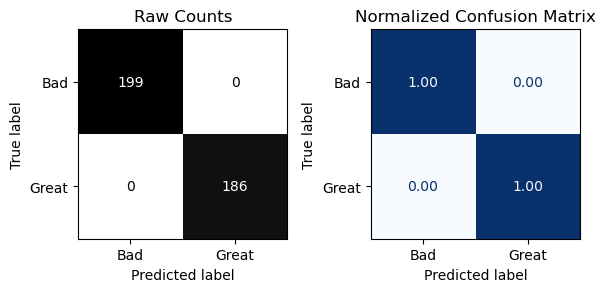


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.80      0.80      0.80        66
       Great       0.79      0.79      0.79        63

    accuracy                           0.80       129
   macro avg       0.80      0.80      0.80       129
weighted avg       0.80      0.80      0.80       129



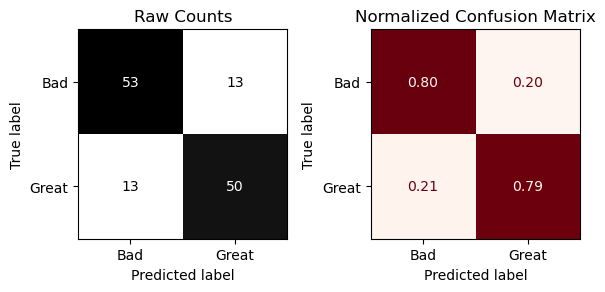

In [164]:
# Evaluating the model
fn.evaluate.evaluate_classification(loaded_model,X_train,y_train, X_test, y_test)

In [165]:
# preds = loaded_model.predict(['This place was amazing!'])
# preds

In [166]:
# ## lookup name
# lookup[preds[0]]

In [167]:
# "I want cheese {x} stars now!".format(x=lookup[preds[0]])

In [229]:
def predict_decode(X_to_pred, clf_pipe, lookup_dict, label_format="{x} Review", return_index=False):
    
    if isinstance(X_to_pred, str):
        
        X = [X_to_pred]
    else:
        X = X_to_pred
    
    pred = clf_pipe.predict(X)
    # Decode label
    label = lookup_dict[pred[0]]
    # label = pred[0]
    final_label = label_format.format(x=str(label))
    
    if return_index==False:
        return final_label
    else:
        return final_label, pred
    

# BOOKMARK END OF DAY 10/27

> NEED TO FIGURE OUT HOW TO BEST USE FILEPATHS IN THE APP!
> Issue with relative filepaths to notebook vs. to .py file vs. to running app


In [169]:
# answer = input("What text to predict?")
answer = "I hated it"
predict_decode(answer,loaded_model)

'Bad Review'

## Neural Network

In [170]:
# fpaths['model-nn-results']

In [171]:
# # @st.cache_data
# def load_nn_model_results(fpath_dict=None,report_fname=None, conf_mat_fname=None,history_fname =None ):
    
#     if fpath_dict is not None:
#         if ( 'confusion_matrix' not in fpath_dict) | ('classification_report' not in fpath_dict):
#             raise Exception("If using fpath_dict, must contain keys: 'confusion_matrix','classification_report'")
            
#         else:
#             conf_mat_fname = fpath_dict['confusion_matrix']
#             report_fname =  fpath_dict['classification_report']


            
#     from PIL import Image
#     conf_mat = Image.open(conf_mat_fname)

#     with open(report_fname) as f:
#         report = f.read()

#     # start dict to return
#     results =  {'classification_report':report, 'confusion_matrix': conf_mat} 


#     if history_fname is not None:
#         history =  Image.open(history_fname)
#         results['history'] = history
    
#     return results

In [172]:
# fpaths_nn_model['history']

In [173]:
# # Get neural network results
# nn_results = load_nn_model_results(fpath_dict=fpaths_nn_model['test'],history_fname=fpaths_nn_model['history'])

# display(nn_results['history'])
# print(nn_results['classification_report'])
# display(nn_results['confusion_matrix'])
# nn_results.keys()

# 📌BOOKMARK EOD 11/23/23 - LOAD NN MODEL NEXT

In [174]:
# # Code for loading and evaluating model and data

# fpath_load_ds = model_df.loc['TestData-Deep', "File Path"]
# fpath_load_ds = fpaths['TestData-Deep']
# fpath_load_deep_model = fpaths['Deep']
# fpath_load_deep_model = model_df.loc["Deep", "File Path"]
# fpath_load_ds, fpath_load_deep_model

### Load NN Model

In [175]:
# FPATHS['metadata']['target_lookup']

In [176]:
def load_nn_model(fpath_load_deep_model):
    return  tf.keras.models.load_model(fpath_load_deep_model)

In [177]:
# loaded_network = tf.keras.models.load_model(fpath_load_deep_model)
loaded_network = load_nn_model(FPATHS['models']['nn']['LSTM']['saved_model'])
loaded_network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 400)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 400, 100)          983300    
                                                                 
 bidirectional_4 (Bidirectio  (None, 400, 128)         84480     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 400, 128)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 400, 128)         98816     
 nal)                                                            
                                                      

In [178]:
def predict_decode_deep(X_to_pred, network,lookup_dict, label_format="{x} Review", 
                       return_index=False):
    
    if isinstance(X_to_pred, str):
        
        X = [X_to_pred]
    else:
        X = X_to_pred
    
    pred_probs = network.predict(X)

    pred = fn.evaluate.convert_y_to_sklearn_classes(pred_probs)
    # Decode label
    label = lookup_dict[pred[0]]
    final_label = label_format.format(x=str(label))
    if return_index==False:
        return final_label
    else:
        return final_label, pred

In [179]:
# answer = input("What text to predict?")
answer = "I hated everything"
predict_decode_deep(answer,loaded_network,lookup)

1/1 [==============================] - 1s 570ms/step


'Great Review'

# Inserting EDA Elements

## Scattertext

In [180]:
def load_scattertext(fpath):
    with open(fpath) as f:
        explorer = f.read()
        return explorer


loaded_scattertext = load_scattertext(FPATHS['eda']['scattertext'])

## Bigrams/WordClouds

- Produce live or pre-saved?

In [181]:
FPATHS

{'data': {'raw': {'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'eda-joblib': 'Data-NLP/eda-movie-reviews.joblib',
   'groups-dict': 'Data-NLP/grouped-data-dict.joblib'},
  'ml': {'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': {'saved_model': 'Models/bayes-clf.joblib',
    'results': 'models/results/bayes/'},
   'random_forest': {'saved_model': 'Models/random-forest.joblib',
    'results': 'Models/results/random-forest/'}},
  'nn': {'LSTM': {'saved_model': 'Models/keras/lstm/',
    'results': 'Models/results/lstm/results/'},
   'Attention': {'saved_model': 'models/keras/attn/',
    'results': 'models/results/attn/results/'}}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'eda': {'wordclouds': 'EDA/wordclouds-compare.png',
  'sc

> saving of the groups dict has been moved to the notebook 00 for generating assets.
> Instead, we will load in the joblib file here and jump straight to the bigrams 

In [182]:
%%time
def load_groups_joblib(fpath):
    import joblib
    return joblib.load(fpath)


GROUPS = load_groups_joblib(FPATHS['data']['raw']['groups-dict'])
GROUPS.keys()

CPU times: user 133 ms, sys: 3.11 ms, total: 136 ms
Wall time: 136 ms


dict_keys(['Great', 'Bad'])

In [183]:
GROUPS["Great"].keys()

dict_keys(['text', 'tokens', 'tokens_dirty'])

## Display WordClouds (non-interactive)

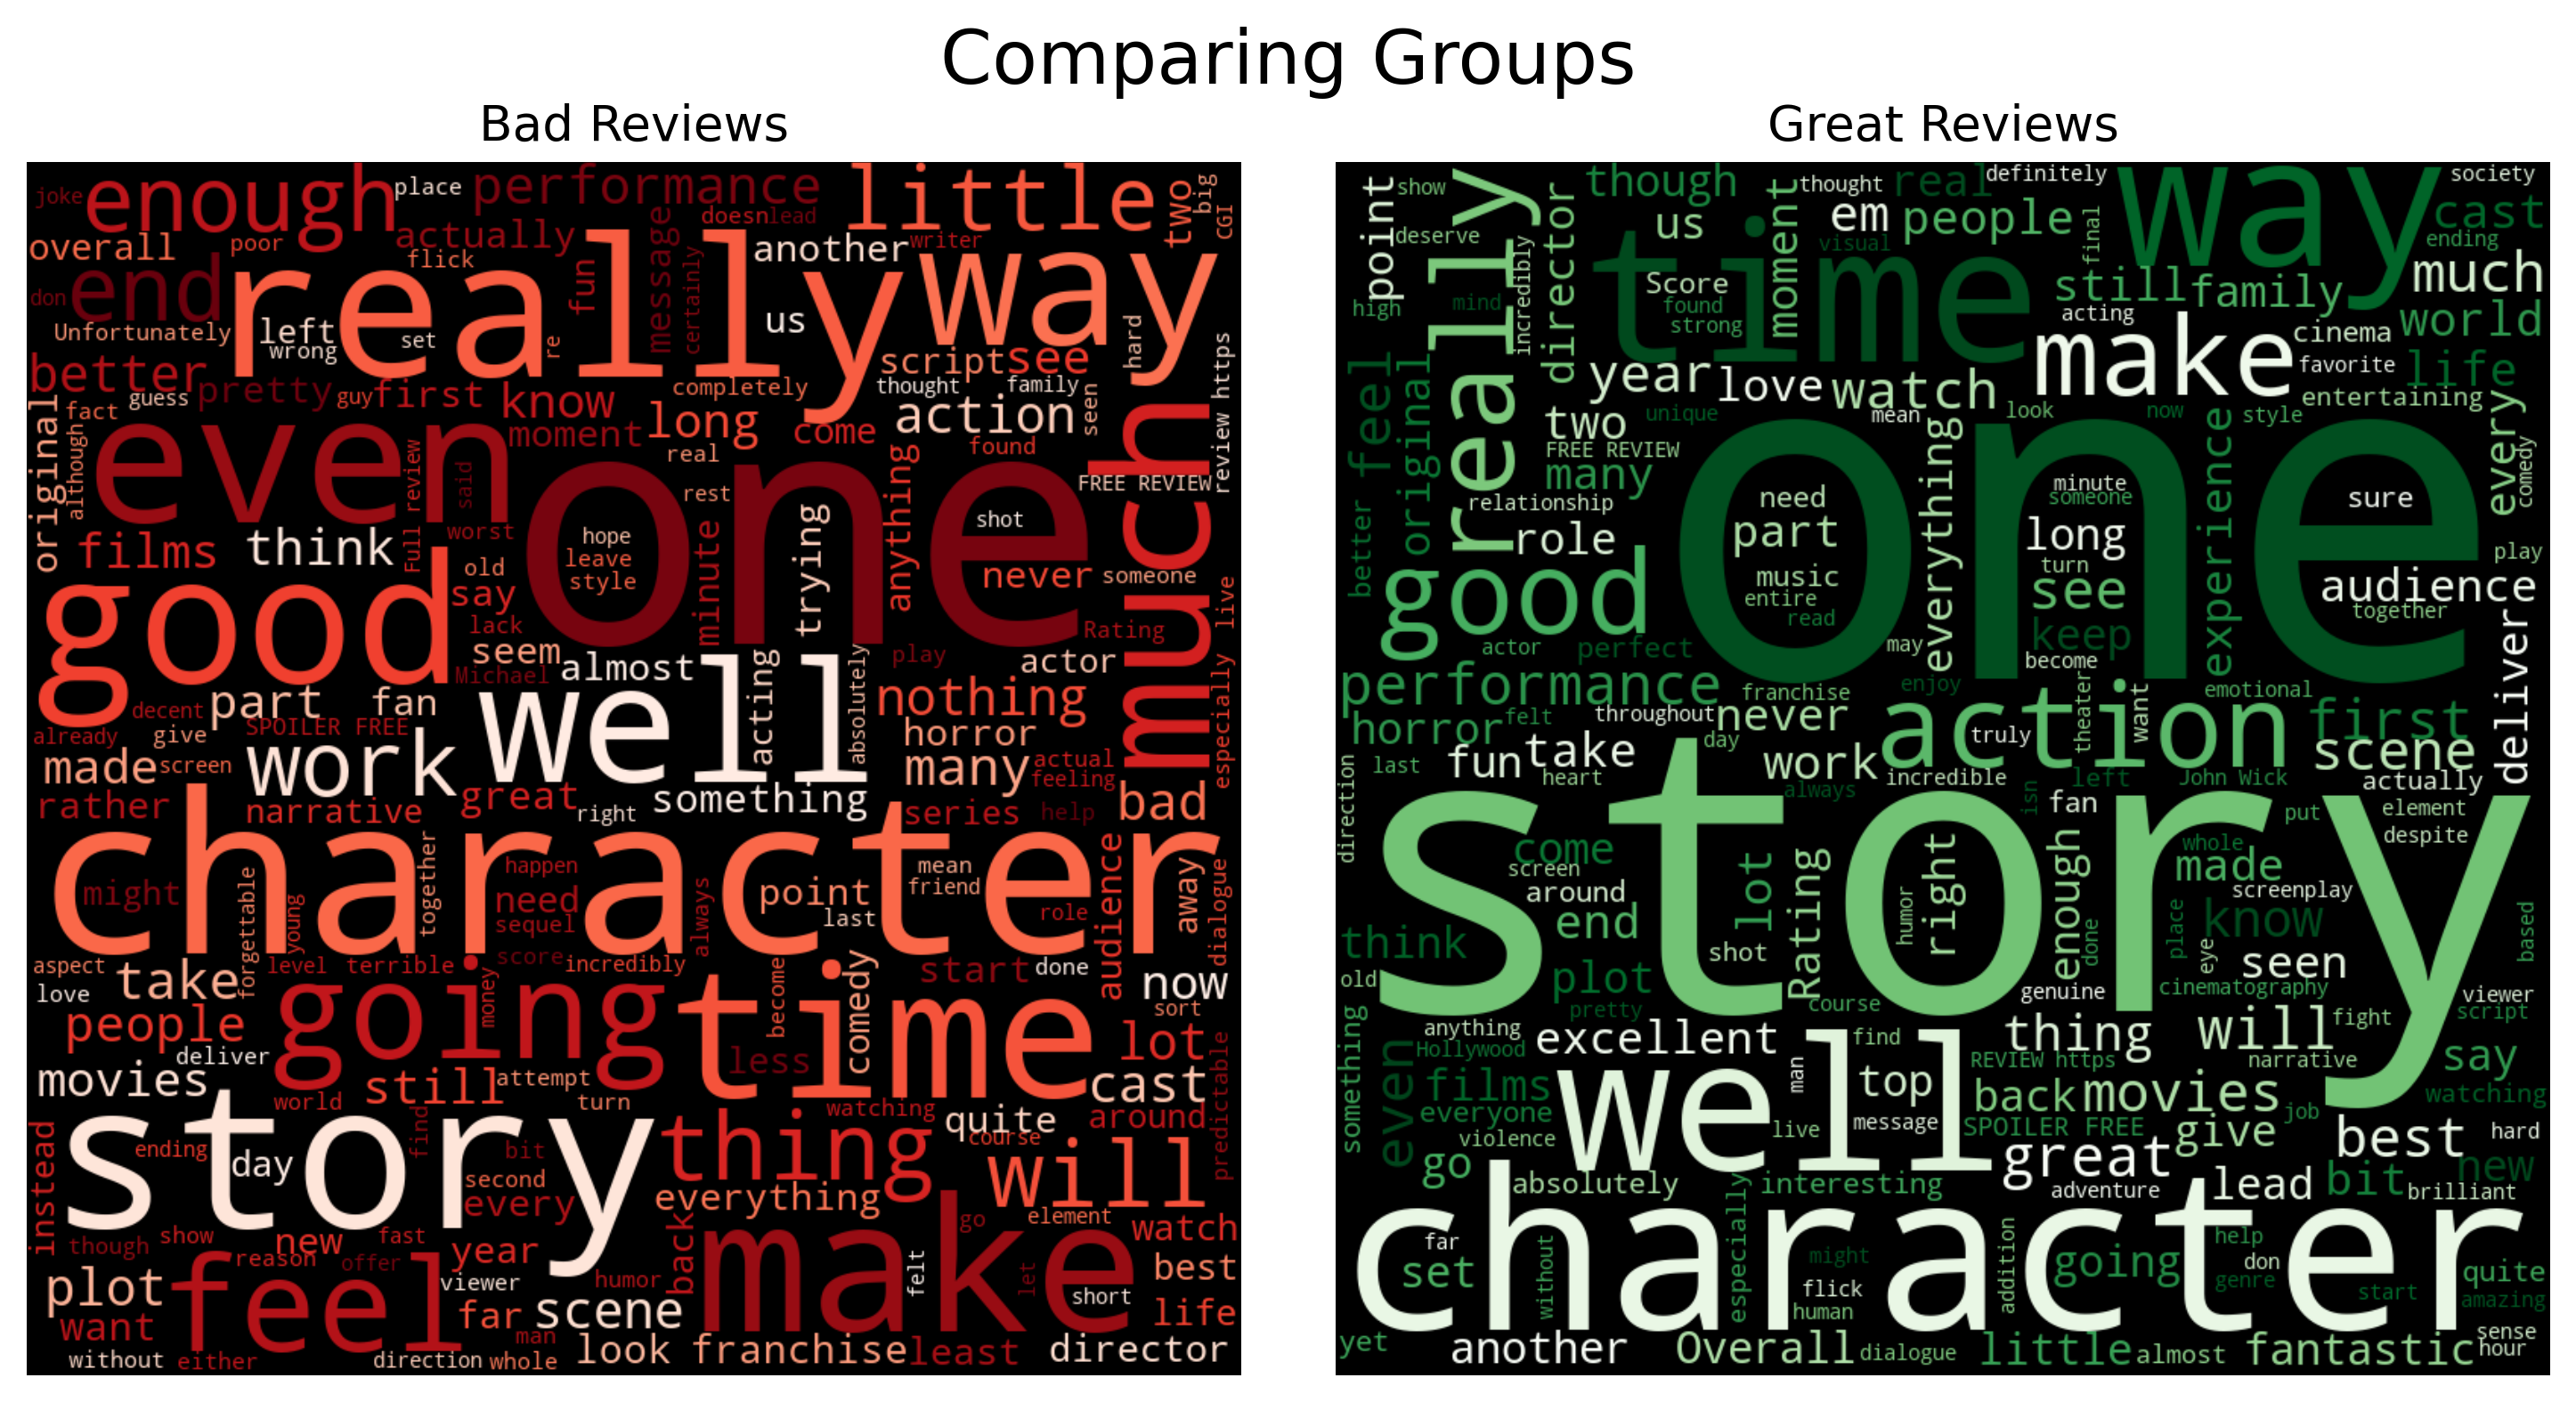

In [184]:
from PIL import Image

img = Image.open(FPATHS['eda']['wordclouds'])
img

## Bigrams (interactive?)

In [185]:
import nltk
def get_ngram_measures_finder(tokens=None,docs=None, ngrams=2, verbose=False,
                              get_scores_df=False, measure='raw_freq', top_n=None,
                             words_colname='Words'):
    
    if ngrams ==4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
    if (tokens is not None):
        finder = FinderClass.from_words(tokens)
    elif (docs is not None):
        finder = FinderClass.from_docs(docs)
    else:
        raise Exception("Must provide tokens or docs")
        

    if get_scores_df == False:
        return measures, finder
        
    else:
        df_ngrams = get_score_df(measures, finder, measure=measure, top_n=top_n, words_colname=words_colname)
        return df_ngrams




def get_score_df( measures,finder, measure='raw_freq', top_n=None, words_colname="Words"):
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams



In [186]:
GROUPS["Bad"].keys()

dict_keys(['text', 'tokens', 'tokens_dirty'])

In [187]:
GROUPS["Bad"]['tokens'][:5]

['movie', 'terrible', 'obviously', 'rated', 'interested']

`'tokens_nostop-combined-list'` -> `'tokens'`

In [188]:
# GROUPS[1]['tokens_nostop-combined-list'][:5]

In [189]:
# def select_text_col


In [190]:
# ## Test Code for Making New Trigrams for both groups
# ngram_kws = dict(ngrams=3,  get_scores_df=True, top_n=20)

# df_ngrams_1star = get_ngram_measures_finder(tokens=GROUPS[1]['tokens_nostop-combined-list'], 
#                                             words_colname="1 Star Reviews - Trigrams",
#                                            **ngram_kws)
# df_ngrams_5star= get_ngram_measures_finder(tokens=GROUPS[5]['tokens_nostop-combined-list'], 
#                                            words_colname="5 Star Reviews - Trigrams",
#                                            **ngram_kws)

# combined_ngrams = pd.concat([df_ngrams_1star,df_ngrams_5star],axis=1)
# combined_ngrams

In [191]:

def show_group_ngrams(GROUPS, col='tokens', ngrams=3, top_n=20):

    group_names = list(GROUPS.keys())
    # Set kws
    ngram_kws = dict(ngrams=ngrams,  get_scores_df=True, top_n=top_n)

    ngram_df_list = []
    for group in group_names:
        tokens = GROUPS[group][col]
        ngram_df = fn.nlp.get_ngram_measures_finder(tokens=tokens, words_colname= f"{group} Review Words" ,get_scores_df=True)
        ngram_df_list.append(ngram_df)
    
    # df_ngrams_1star = fn.nlp.get_ngram_measures_finder(tokens=GROUPS[1][col], words_colname=f"1 Star n-grams", **ngram_kws)
    # df_ngrams_1star.columns =[ "1 Star n-grams", "1 Star-Freq"]
                              
    # df_ngrams_5star= get_ngram_measures_finder(tokens=GROUPS[5][col], words_colname=f"5 Star n-grams", **ngram_kws)
    # df_ngrams_5star.columns =[ "5 Star n-grams", "5 Star-Freq"]
    
    combined_ngrams = pd.concat(ngram_df_list,axis=1)
    return combined_ngrams

show_group_ngrams(GROUPS)

Great Review Words  Raw Freq    Bad Review Words  Raw Freq
0        (spoiler, free)  0.001060     (spoiler, free)  0.000820
1           (john, wick)  0.000856  (special, effects)  0.000777
2         (free, review)  0.000775       (feels, like)  0.000734
3                 (<, >)  0.000734    (indiana, jones)  0.000647
4           (rating, a-)  0.000612      (free, review)  0.000388
...                  ...       ...                 ...       ...
22242          (🌟, hard)  0.000041                 NaN       NaN
22243             (😂, <)  0.000041                 NaN       NaN
22244          (😂, rely)  0.000041                 NaN       NaN
22245       (😂, sublime)  0.000041                 NaN       NaN
22246     (😱, effective)  0.000041                 NaN       NaN

[22247 rows x 4 columns]

In [192]:
# df_eda['stars'].value_counts()

In [193]:
# df_eda['text'].map(lambda x: len(x.split())).hist()

In [194]:
# import nltk

In [195]:
# groups = df_eda['stars'].unique()
# groups

# Testing Model Explainers Live (not pre-saved)

In [196]:
test = "At first everything was good, but then the main dish came and i hated it!"
test

'At first everything was good, but then the main dish came and i hated it!'

In [197]:
lookup

{1: 'Great', 0: 'Bad'}

## BOOKMARK: RAODBLOCK WITH STRINGS VS NAMES

In [232]:
from lime.lime_text import LimeTextExplainer
classes =list(lookup.values())
lime_explainer= LimeTextExplainer(class_names=classes)
# lime_explainer.explain_instance()

def explain_prediction( explainer,text, predict_func, num_features=10, labels=(0,1)):
    # Preprocess the text data and make a prediction
    # Generate an explanation with at most 10 features
    exp = explainer.explain_instance(text, predict_func, num_features=num_features, labels=labels)
    return exp#, proba


In [238]:
from lime.lime_text import LimeTextExplainer
target_lookup['lookup_codes']

{'Great': '1', 'Bad': '0'}

In [239]:
X_demo = 'I hated everything!'
pred, label_index = predict_decode(X_demo,loaded_model,target_lookup['lookup_codes'],return_index=True)
pred, label_index

('0 Review', array(['Bad'], dtype='<U5'))

In [223]:
X_demo

'I hated everything!'

In [224]:
loaded_model.predict([X_demo])

array(['Bad'], dtype='<U5')

In [225]:
# Display explanation
# X_demo = [test]
explanation = explain_prediction(lime_explainer,X_demo, loaded_model.predict_proba)
explanation_html = explanation.as_html()
# components.html(explanation_html, height=300)

In [230]:
X_demo = 'I hated everything!'
pred, label_index = predict_decode(X_demo,loaded_model,return_index=True)
pred, label_index

TypeError: predict_decode() missing 1 required positional argument: 'lookup_dict'

In [231]:
# classes =['1 Stars','3 Stars','5 Stars']
lime_explainer_ml = LimeTextExplainer(class_names=classes,)
explanation_ml = lime_explainer_ml.explain_instance(X_demo, loaded_model.predict_proba,labels=label_index)
explanation_ml.show_in_notebook()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [316]:
pred, label_index = predict_decode_deep(X_demo,loaded_network,lookup,return_index=True)
pred, label_index

1/1 [==============================] - 0s 45ms/step


('1 stars', array([0]))

In [326]:
# lime_explainer_nn = LimeTextExplainer(class_names=classes)
explanation_nn = lime_explainer_ml.explain_instance(X_demo, loaded_network.predict,labels=label_index)
explanation_nn.show_in_notebook()

157/157 [==============================] - 3s 21ms/step


In [242]:
# import shap
# shap.initjs()

In [243]:
# loaded_model = loaded_joblib['model']
# X_test = loaded_joblib['X_train']
# y_test = loaded_joblib['y_train']

In [244]:
# X_shap = shap.sample(X_test, nsamples=400,random_state=42)
# y_shap = y_test.loc[X_shap.index]
# X_shap

In [245]:
# explainer = shap.Explainer(loaded_model.predict)
# shap_values = explainer(X_shap)